In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
df_hogar = pd.read_csv('../files/01_csv/csv_consolidated/hogar.csv')
df_fecundidad = pd.read_csv('../files/01_csv/csv_consolidated/fecundidad.csv')

In [3]:
df_hogar.head()

,ID1,HHID,HV012,HV013,HV024,HV025
0,2014,252300501,4,4,Lima,Urbano
1,2014,252301601,11,11,Lima,Urbano
2,2014,252302701,5,5,Lima,Urbano
3,2014,252303801,8,8,Lima,Urbano
4,2014,252304901,3,3,Lima,Urbano


In [4]:
df_fecundidad.head()

,ID1,CASEID,V221,V212,V225
0,2014,000100301 2,11.0,30.0,Queria esperar
1,2014,000102801 1,59.0,18.0,NaN
2,2014,000102801 2,NaN,NaN,NaN
3,2014,000106101 2,negativo,23.0,NaN
4,2014,000106801 2,12.0,19.0,NaN


In [10]:
df_fecundidad['CASEID_N'] = df_fecundidad.CASEID.apply(lambda x: x.split()[1])

In [24]:
df_fecundidad['HHID'] = df_fecundidad.CASEID.apply(lambda x: int(x.split()[0]))

In [25]:
df_fecundidad.head()

,ID1,CASEID,V221,V212,V225,CASEID_N,HHID
0,2014,000100301 2,11.0,30.0,Queria esperar,2,100301
1,2014,000102801 1,59.0,18.0,NaN,1,102801
2,2014,000102801 2,NaN,NaN,NaN,2,102801
3,2014,000106101 2,negativo,23.0,NaN,2,106101
4,2014,000106801 2,12.0,19.0,NaN,2,106801


In [26]:
df_hogar.shape

(215255, 6)

In [27]:
df_fecundidad.shape

(210903, 7)

In [28]:
df_hogar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215255 entries, 0 to 215254
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   ID1     215255 non-null  int64 
 1   HHID    215255 non-null  int64 
 2   HV012   215255 non-null  int64 
 3   HV013   215255 non-null  int64 
 4   HV024   215255 non-null  object
 5   HV025   215255 non-null  object
dtypes: int64(4), object(2)
memory usage: 9.9+ MB


In [29]:
df_fecundidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210903 entries, 0 to 210902
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   ID1       210903 non-null  int64  
 1   CASEID    210903 non-null  object 
 2   V221      152126 non-null  object 
 3   V212      160615 non-null  float64
 4   V225      7306 non-null    object 
 5   CASEID_N  210903 non-null  object 
 6   HHID      210903 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 11.3+ MB


In [30]:
df_test_merge = pd.merge(df_hogar, df_fecundidad, how='inner', on=['ID1', 'HHID'])

In [32]:
df_test_merge.shape

(180111, 11)

In [44]:
# Testing for singular cases
df_hogar_1 = df_hogar[df_hogar['HV012'] == 1]

In [45]:
df_test_merge_1 = pd.merge(df_hogar_1, df_fecundidad, how='inner', on=['ID1', 'HHID'])

In [46]:
df_test_merge_1

,ID1,HHID,HV012,HV013,HV024,HV025,CASEID,V221,V212,V225,CASEID_N
0,2014,210601901,1,1,Tumbes,Urbano,210601901 2,NaN,NaN,NaN,2
1,2014,210610701,1,0,Tumbes,Urbano,210610701 3,21.0,30.0,NaN,3
2,2014,208401201,1,1,Tumbes,Urbano,208401201 3,4.0,19.0,NaN,3
3,2014,208503901,1,1,Tumbes,Urbano,208503901 2,35.0,18.0,NaN,2
4,2014,281704901,1,1,Tumbes,Urbano,281704901 2,20.0,25.0,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...
1642,2019,318300601,1,1,Tumbes,Urbano,318300601 1,NaN,NaN,NaN,1
1643,2019,318808901,1,3,Tumbes,Urbano,318808901 3,negativo,15.0,NaN,3
1644,2019,319807801,1,1,Ucayali,Urbano,319807801 1,NaN,NaN,NaN,1
1645,2019,322708601,1,1,Ucayali,Urbano,322708601 1,19.0,18.0,NaN,1


In [48]:
df_test_merge_1[df_test_merge_1.duplicated(['HHID'], keep=False)]

,ID1,HHID,HV012,HV013,HV024,HV025,CASEID,V221,V212,V225,CASEID_N
5,2014,259007701,1,1,Loreto,Urbano,259007701 2,9.0,17.0,NaN,2
6,2014,259007701,1,1,Loreto,Urbano,259007701 3,NaN,NaN,NaN,3
7,2014,259007701,1,1,Loreto,Urbano,259007701 4,NaN,NaN,NaN,4
9,2014,143906501,1,0,Amazonas,Rural,143906501 2,34.0,28.0,NaN,2
10,2014,143906501,1,0,Amazonas,Rural,143906501 5,NaN,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...
1503,2019,142505401,1,4,San Martin,Rural,142505401 3,negativo,18.0,Queria esperar,3
1546,2019,195609201,1,7,Cajamarca,Rural,195609201 2,29.0,28.0,NaN,2
1547,2019,195609201,1,7,Cajamarca,Rural,195609201 4,NaN,NaN,NaN,4
1609,2019,283702301,1,3,Moquegua,Rural,283702301 1,1.0,19.0,NaN,1


In [49]:
df_fecundidad.V225.value_counts(dropna = False)

NaN               203597
Queria esperar      3075
En ese momento      2797
No                  1434
Name: V225, dtype: int64

In [50]:
df_fecundidad.V212.value_counts(dropna = False)

NaN     50288
19.0    18241
18.0    18129
20.0    16217
17.0    16025
21.0    13379
16.0    11647
22.0    10878
23.0     8685
24.0     6910
15.0     6391
25.0     5855
26.0     4755
27.0     4038
28.0     3417
29.0     2669
14.0     2600
30.0     2278
31.0     1763
32.0     1452
33.0     1098
34.0      838
13.0      712
35.0      671
36.0      504
37.0      386
38.0      273
39.0      221
12.0      158
40.0      156
41.0      116
42.0       53
43.0       35
11.0       26
44.0       17
45.0       11
46.0        7
10.0        2
48.0        1
49.0        1
Name: V212, dtype: int64

In [51]:
df_fecundidad.V221.value_counts(dropna = False)

NaN         58777
negativo    23231
9.0          7191
10.0         6691
8.0          6147
            ...  
244.0           1
236.0           1
251.0           1
206.0           1
176.0           1
Name: V221, Length: 241, dtype: int64

In [57]:
pd.set_option('display.max_rows', None)

In [ ]:
# Limpiando df_fecundidad

In [59]:
df_fecundidad.shape

(210903, 7)

In [60]:
df_fecundidad_imp = df_fecundidad.dropna(subset=['V212'])

In [61]:
df_fecundidad_imp.shape

(160615, 7)

In [62]:
df_fecundidad_imp.V221.value_counts(dropna = False)

negativo             23231
NaN                   8489
9.0                   7191
10.0                  6691
8.0                   6147
12.0                  5773
11.0                  5715
7.0                   5091
negative interval     4939
6.0                   4872
13.0                  4648
0.0                   4311
5.0                   4188
14.0                  3966
15.0                  3502
4.0                   3386
16.0                  3158
1.0                   3024
17.0                  2996
21.0                  2830
3.0                   2795
18.0                  2700
20.0                  2609
19.0                  2578
22.0                  2573
2.0                   2360
23.0                  2080
24.0                  1959
25.0                  1711
26.0                  1545
27.0                  1329
28.0                  1234
29.0                  1105
31.0                  1055
32.0                  1034
30.0                  1018
33.0                   959
3

In [63]:
df_fecundidad_imp["V221"].replace({"negativo": -1, "negative interval": -1}, inplace=True)
df_fecundidad_imp["V221"] = pd.to_numeric(df_fecundidad_imp["V221"])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
<ipython-input-63-002e4051a9ad>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fecundidad_imp["V221"] = pd.to_numeric(df_fecundidad_imp["V221"])


In [64]:
df_fecundidad_imp.V221.value_counts(dropna = False)

-1.0      28170
 NaN       8489
 9.0       7191
 10.0      6691
 8.0       6147
 12.0      5773
 11.0      5715
 7.0       5091
 6.0       4872
 13.0      4648
 0.0       4311
 5.0       4188
 14.0      3966
 15.0      3502
 4.0       3386
 16.0      3158
 1.0       3024
 17.0      2996
 21.0      2830
 3.0       2795
 18.0      2700
 20.0      2609
 19.0      2578
 22.0      2573
 2.0       2360
 23.0      2080
 24.0      1959
 25.0      1711
 26.0      1545
 27.0      1329
 28.0      1234
 29.0      1105
 31.0      1055
 32.0      1034
 30.0      1018
 33.0       959
 34.0       812
 36.0       806
 35.0       765
 37.0       635
 40.0       582
 38.0       565
 39.0       536
 43.0       484
 41.0       484
 42.0       473
 44.0       438
 45.0       424
 46.0       415
 47.0       357
 48.0       330
 49.0       328
 50.0       303
 53.0       296
 51.0       288
 54.0       275
 52.0       256
 55.0       249
 57.0       246
 56.0       224
 60.0       217
 59.0       215
 61.0   

In [65]:
df_base = pd.read_csv('../../pitch.csv')

In [66]:
df_base.head()

,anho,casa_id,nro_vivientes_jure,nro_vivientes_facto,region,area_residencia,fuente_agua,tipo_banho,tipo_piso,indice_riqueza,persona_id,sexo,edad,educacion
0,2014,252300501,4,4,Lima,Urbano,Red dentro de la vivienda,Conectado a red publica dentro de la vivienda,Cemento / Ladrillo,5 - Muy rico,1,Masculino,38,Secundaria incompleta
1,2014,252300501,4,4,Lima,Urbano,Red dentro de la vivienda,Conectado a red publica dentro de la vivienda,Cemento / Ladrillo,5 - Muy rico,2,Femenino,32,Secundaria incompleta
2,2014,252300501,4,4,Lima,Urbano,Red dentro de la vivienda,Conectado a red publica dentro de la vivienda,Cemento / Ladrillo,5 - Muy rico,3,Masculino,13,Secundaria incompleta
3,2014,252300501,4,4,Lima,Urbano,Red dentro de la vivienda,Conectado a red publica dentro de la vivienda,Cemento / Ladrillo,5 - Muy rico,4,Femenino,5,Sin educacion
4,2014,252301601,11,11,Lima,Urbano,Red dentro de la vivienda,Conectado a red publica dentro de la vivienda,Cemento / Ladrillo,4 - Rico,1,Masculino,50,Secundaria incompleta


In [68]:
df_base.shape

(818979, 14)

In [69]:
df_fecundidad_imp.shape

(160615, 7)

In [75]:
df_fecundidad.columns

Index(['anho', 'CASEID', 'V221', 'V212', 'V225', 'persona_id', 'casa_id'], dtype='object')

In [74]:
df_fecundidad.columns = ['anho', 'CASEID', 'V221', 'V212', 'V225', 'persona_id', 'casa_id']

In [77]:
df_fecundidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210903 entries, 0 to 210902
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   anho        210903 non-null  int64  
 1   CASEID      210903 non-null  object 
 2   V221        152126 non-null  object 
 3   V212        160615 non-null  float64
 4   V225        7306 non-null    object 
 5   persona_id  210903 non-null  object 
 6   casa_id     210903 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 11.3+ MB


In [78]:
df_fecundidad_imp.columns = ['anho', 'CASEID', 'V221', 'V212', 'V225', 'persona_id', 'casa_id']

In [79]:
df_fecundidad_imp["persona_id"] = pd.to_numeric(df_fecundidad_imp["persona_id"])

<ipython-input-79-636033d5f2ed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fecundidad_imp["persona_id"] = pd.to_numeric(df_fecundidad_imp["persona_id"])


In [82]:
df_fecundidad_imp.shape

(160615, 7)

In [83]:
df_fecun_complete = pd.merge(df_base, df_fecundidad_imp, how='inner', on=['anho', 'casa_id','persona_id'])

In [84]:
df_fecun_complete.shape

(133012, 18)

In [87]:
df_fecun_complete.head().T

,0,1,2,3,4
anho,2014,2014,2014,2014,2014
casa_id,252301601,260105101,259813201,188800901,260506501
nro_vivientes_jure,11,7,2,6,10
nro_vivientes_facto,11,6,2,6,8
region,Lima,Loreto,Loreto,Loreto,Loreto
area_residencia,Urbano,Rural,Urbano,Rural,Rural
fuente_agua,Red dentro de la vivienda,Rio / acequia / laguna,Red dentro de la vivienda,Rio / acequia / laguna,Rio / acequia / laguna
tipo_banho,Conectado a red publica dentro de la vivienda,Sin servicio,Conectado a red publica dentro de la vivienda,Sin servicio,Sin servicio
tipo_piso,Cemento / Ladrillo,Madera,Tierra / arena,Otro,Madera
indice_riqueza,4 - Rico,1 - Muy pobre,2 - Pobre,1 - Muy pobre,1 - Muy pobre


In [89]:
df_fecun_complete.anho.value_counts()

2015    27514
2018    27214
2019    25798
2017    25764
2016    25362
2014     1360
Name: anho, dtype: int64

In [91]:
df_fecun_complete.V225.value_counts(dropna=False)

NaN               128467
Queria esperar      1713
En ese momento      1700
No                  1132
Name: V225, dtype: int64

In [92]:
df_fecun_complete.V212.value_counts(dropna=False)

19.0    15123
18.0    14988
20.0    13438
17.0    13287
21.0    11051
16.0     9661
22.0     8947
23.0     7160
24.0     5681
15.0     5361
25.0     4823
26.0     3905
27.0     3355
28.0     2823
29.0     2188
14.0     2159
30.0     1900
31.0     1480
32.0     1209
33.0      928
34.0      715
13.0      597
35.0      565
36.0      416
37.0      334
38.0      237
39.0      188
12.0      135
40.0      130
41.0      100
42.0       46
43.0       27
11.0       20
44.0       15
45.0       10
46.0        6
10.0        2
48.0        1
49.0        1
Name: V212, dtype: int64

In [93]:
df_fecun_complete.columns

Index(['anho', 'casa_id', 'nro_vivientes_jure', 'nro_vivientes_facto',
       'region', 'area_residencia', 'fuente_agua', 'tipo_banho', 'tipo_piso',
       'indice_riqueza', 'persona_id', 'sexo', 'edad', 'educacion', 'CASEID',
       'V221', 'V212', 'V225'],
      dtype='object')

In [94]:
df_fecun_complete.columns = ['anho', 'casa_id', 'nro_vivientes_jure', 'nro_vivientes_facto',
       'region', 'area_residencia', 'fuente_agua', 'tipo_banho', 'tipo_piso',
       'indice_riqueza', 'persona_id', 'sexo', 'edad', 'educacion', 'CASEID',
       'meses_entre_union_primer_nacimiento', 'edad_primer_nacimiento', 'embarazo_deseado']

In [95]:
df_fecun_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133012 entries, 0 to 133011
Data columns (total 18 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   anho                                 133012 non-null  int64  
 1   casa_id                              133012 non-null  int64  
 2   nro_vivientes_jure                   133012 non-null  int64  
 3   nro_vivientes_facto                  133012 non-null  int64  
 4   region                               133012 non-null  object 
 5   area_residencia                      133012 non-null  object 
 6   fuente_agua                          133012 non-null  object 
 7   tipo_banho                           133012 non-null  object 
 8   tipo_piso                            133012 non-null  object 
 9   indice_riqueza                       133012 non-null  object 
 10  persona_id                           133012 non-null  int64  
 11  sexo         

In [96]:
df_fecun_complete.sexo.value_counts(dropna = False)

Femenino     132619
Masculino       393
Name: sexo, dtype: int64

In [97]:
df_fecun_complete = df_fecun_complete[df_fecun_complete['sexo'] == 'Femenino']

In [98]:
df_fecun_complete.to_csv('../files/01_csv/csv_consolidated/fecundidad_complete.csv',index=False)

In [118]:
import lightgbm as lgbm

In [126]:
cols_fit = ['region','area_residencia', 'fuente_agua',
                   'tipo_banho','tipo_piso','indice_riqueza',
                   'edad','educacion']

In [127]:
col_target = 'edad_primer_nacimiento'

# Fitting with respect to Edad al primer nacimiento

In [128]:
parameters = {
    'application': 'regression',
    'objective': 'regression',
    'metric': 'l2',
    'boosting': 'gbdt',
    'num_leaves': 31,
    'feature_fraction': 0.5,
    'bagging_fraction': 0.5,
    'bagging_freq': 20,
    'learning_rate': 0.05,
    'verbose': 0
}

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
df_fecun_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132619 entries, 0 to 133011
Data columns (total 18 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   anho                                 132619 non-null  int64  
 1   casa_id                              132619 non-null  int64  
 2   nro_vivientes_jure                   132619 non-null  int64  
 3   nro_vivientes_facto                  132619 non-null  int64  
 4   region                               132619 non-null  object 
 5   area_residencia                      132619 non-null  object 
 6   fuente_agua                          132619 non-null  object 
 7   tipo_banho                           132619 non-null  object 
 8   tipo_piso                            132619 non-null  object 
 9   indice_riqueza                       132619 non-null  object 
 10  persona_id                           132619 non-null  int64  
 11  sexo         

In [109]:
df_fecun_complete.fuente_agua.value_counts(dropna=False)

Red dentro de la vivienda                                 94477
Agua embotellada                                          11441
Red fuera de la vivienda pero dentro de la edificacion     7225
Otro                                                       4979
Rio / acequia / laguna                                     3633
Pilon o grifo publico                                      2805
Camion cisterna                                            2271
Manantial                                                  2248
Pozo dentro de la vivienda                                 1988
Pozo publico                                               1171
Agua de lluvia                                              381
Name: fuente_agua, dtype: int64

In [110]:
df_fecun_complete.loc[:, df_fecun_complete.dtypes == 'object'] =\
    df_fecun_complete.select_dtypes(['object'])\
    .apply(lambda x: x.astype('category'))

In [111]:
df_fecun_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132619 entries, 0 to 133011
Data columns (total 18 columns):
 #   Column                               Non-Null Count   Dtype   
---  ------                               --------------   -----   
 0   anho                                 132619 non-null  int64   
 1   casa_id                              132619 non-null  int64   
 2   nro_vivientes_jure                   132619 non-null  int64   
 3   nro_vivientes_facto                  132619 non-null  int64   
 4   region                               132619 non-null  category
 5   area_residencia                      132619 non-null  category
 6   fuente_agua                          132619 non-null  category
 7   tipo_banho                           132619 non-null  category
 8   tipo_piso                            132619 non-null  category
 9   indice_riqueza                       132619 non-null  category
 10  persona_id                           132619 non-null  int64   
 11  

In [112]:
df_fecun_complete.to_csv('../files/01_csv/csv_consolidated/fecundidad_complete.csv',index=False)

In [129]:
feature= df_fecun_complete[cols_fit]
target= df_fecun_complete[col_target]
feature_train, feature_test, target_train, target_test= train_test_split(feature, target, test_size=0.20)

In [130]:
train_data = lgbm.Dataset(feature_train, label=target_train)
test_data = lgbm.Dataset(feature_test, label=target_test)

In [131]:
model = lgbm.train(parameters,
                       train_data,
                       valid_sets=test_data,
                       num_boost_round=5000,
                       early_stopping_rounds=100)

[1]	valid_0's l2: 21.5148
Training until validation scores don't improve for 100 rounds
[2]	valid_0's l2: 21.3338
[3]	valid_0's l2: 20.6871
[4]	valid_0's l2: 20.537
[5]	valid_0's l2: 19.9654
[6]	valid_0's l2: 19.8409
[7]	valid_0's l2: 19.335
[8]	valid_0's l2: 19.2316
[9]	valid_0's l2: 18.7847
[10]	valid_0's l2: 18.7004
[11]	valid_0's l2: 18.3028
[12]	valid_0's l2: 18.2332
[13]	valid_0's l2: 17.8795
[14]	valid_0's l2: 17.8222
[15]	valid_0's l2: 17.5089
[16]	valid_0's l2: 17.4614
[17]	valid_0's l2: 17.1821
[18]	valid_0's l2: 17.1426
[19]	valid_0's l2: 16.8948
[20]	valid_0's l2: 16.8631
[21]	valid_0's l2: 16.6461
[22]	valid_0's l2: 16.6191
[23]	valid_0's l2: 16.4227
[24]	valid_0's l2: 16.4
[25]	valid_0's l2: 16.2259
[26]	valid_0's l2: 16.2075
[27]	valid_0's l2: 16.0515
[28]	valid_0's l2: 16.0365
[29]	valid_0's l2: 15.8967
[30]	valid_0's l2: 15.8856
[31]	valid_0's l2: 15.7601
[32]	valid_0's l2: 15.7502
[33]	valid_0's l2: 15.6372
[34]	valid_0's l2: 15.6295
[35]	valid_0's l2: 15.5282
[36]	va

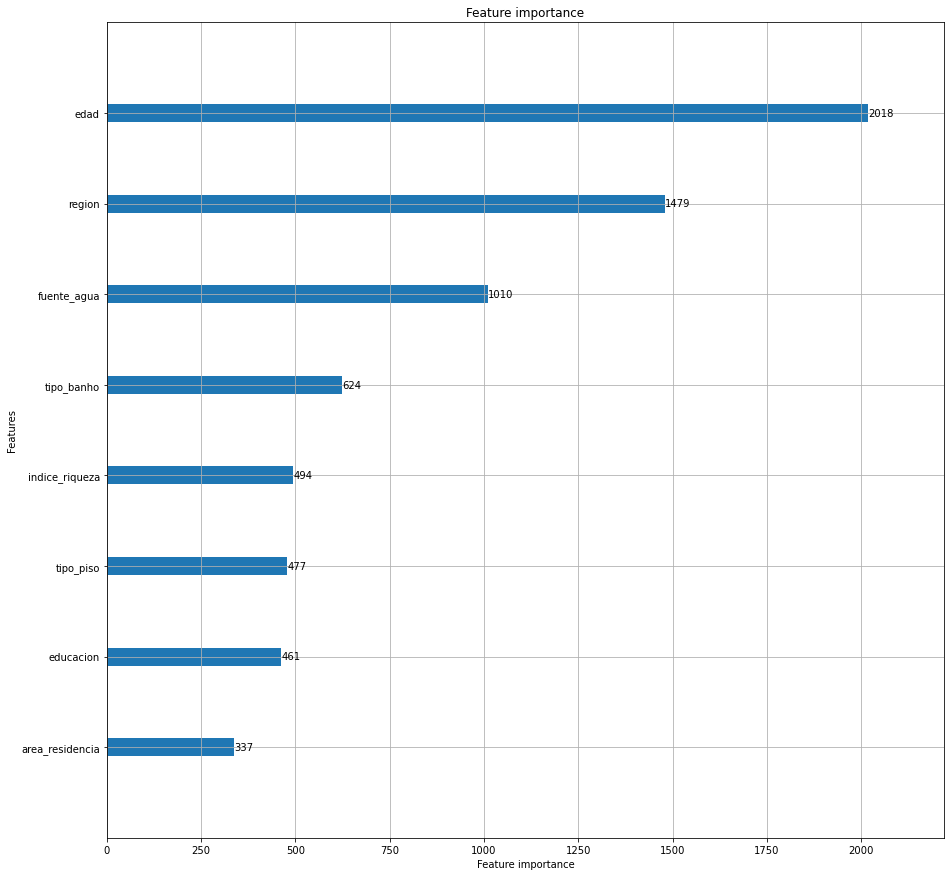

In [132]:
ax = lgbm.plot_importance(model, max_num_features=40, figsize=(15,15))

In [133]:
ax.figure.savefig('../files/08_plots/feat_imp_primer_nacimiento.png')